In [1]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

In [2]:
from pandas import read_csv

# Carregando os dados
arquivo = 'dados/pima-data-banceled.csv'
dados = read_csv(arquivo)

In [3]:
# Distribuição das classes
dados.groupby('class').size()

class
0    268
1    268
dtype: int64

In [4]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv

In [5]:
# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:7]
Y = array[:,9]

In [6]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# field names 
fields = ['Tipo','Modelo', 'Descrição Modelo', 'Acurária', 'Desvio'] 
    
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RF', RandomForestClassifier(n_estimators=100)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

with open('resultados/resultados.csv', 'a') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)

    # Construção dos Modelos
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
        cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s - %s: %f (%f)" % (nome, modelo, cv_results.mean(), cv_results.std())
        print(msg)

        # data rows of csv file 
        rows = [['without', nome, modelo, cv_results.mean() , cv_results.std()] ]
        write.writerows(rows)
    
    # Close the file object
    f.close()

LR - LogisticRegression(): 0.734906 (0.055818)
KNN - KNeighborsClassifier(): 0.682809 (0.052930)
CART - DecisionTreeClassifier(): 0.647554 (0.083847)
SVM - SVC(): 0.714465 (0.057995)
RF - RandomForestClassifier(): 0.737142 (0.039773)


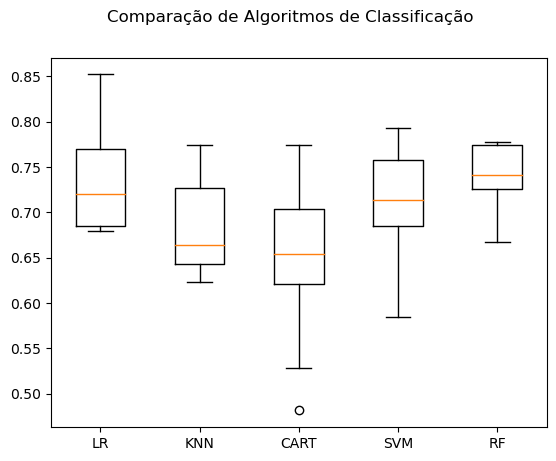

In [7]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

plt.savefig("graficos/Normalizacao_without.png")

plt.show()